# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis

In [59]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

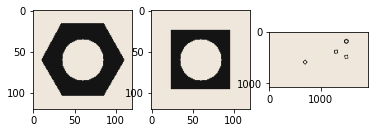

In [60]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [61]:
hexnut_template_gray = cv.cvtColor(hexnut_template,cv.COLOR_RGB2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template,cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100,cv.COLOR_RGB2GRAY)

ret1, hexnut_template_thr = cv.threshold(hexnut_template_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2 ,squarenut_template_thr = cv.threshold(squarenut_template_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3 ,conveyor_f100_thr = cv.threshold(conveyor_f100_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

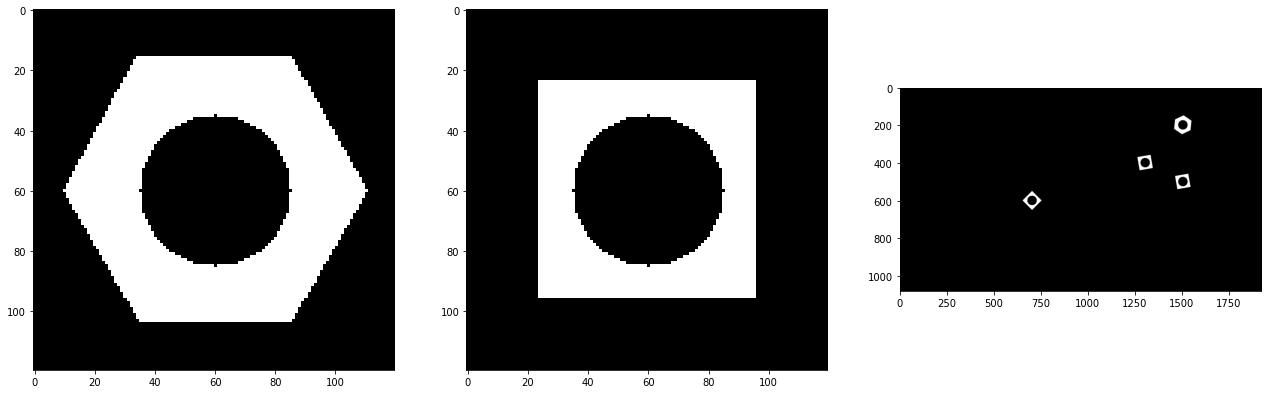

20.0 20.0 20.0


In [62]:
fig, ax = plt. subplots(1,3 , figsize = (22,10))
ax[0].imshow(cv.cvtColor(hexnut_template_thr, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template_thr, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100_thr, cv.COLOR_RGB2BGR))
plt.show()

print(ret1 ,ret2 ,ret3)

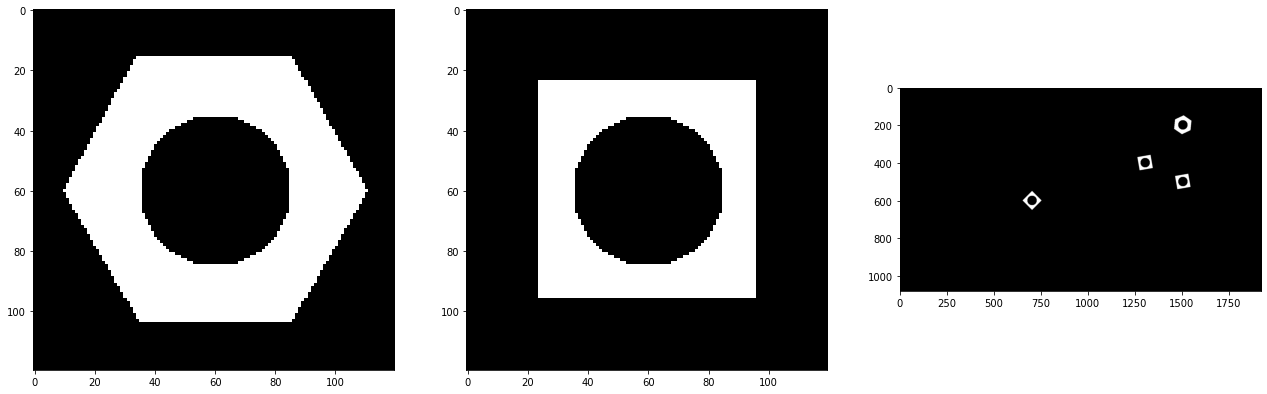

In [63]:
#kernel = np.array([[0,1,0],[1,0,1],[0,1,0]],dtype= np.uint8)
kernel = np.ones((3,3))

hexnut_template_closed = cv.morphologyEx(hexnut_template_thr, cv.MORPH_CLOSE, kernel)
squarenut_template_closed = cv.morphologyEx(squarenut_template_thr, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_thr, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3 , figsize = (22,10))
ax[0].imshow(cv.cvtColor(hexnut_template_closed, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template_closed, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100_closed, cv.COLOR_RGB2BGR))
plt.show()

In [64]:
def Is_component(image,width,height,area):
    w = width>10 and width<image.shape[0]-10
    h = height>10 and height<image.shape[1]-10
    A = area>100 and area < (image.shape[0]-10)*(image.shape[1]-10)
    if ( w and h and A):
        return True
    return False



def Analayse(img_thrs,img_original, thikness ):
    output = cv.connectedComponentsWithStats(img_thrs , 8, cv.CV_32S )
    (numLabels, labels, stats, centroids) = output

    print("Number of connected components =",numLabels-1)

    item_count = 0

    for i in range (0 , numLabels):
        
        x, y, width, height, area = stats[i]

        if Is_component(img_thrs,width,height,area):
            item_count +=1

            print ("Item No :", item_count)
            print ("Area Is =" , area)
            print("Centroid is = ", int(centroids[i][0] + 0.5), int(centroids[i][1] + 0.5))
            print ("\n")
            
            image = cv.rectangle(img_original, (x, y), (x+width, y+height), (0, 255, 0), thikness)
            cv.putText(img_original, str(item_count), (x, y-2), cv.FONT_HERSHEY_SIMPLEX, image.shape[0]/500, (255, 0, 255), 1, cv.LINE_AA)

    return(img_original)

 Analysis of Hex Nut Image

Number of connected components = 1
Item No : 1
Area Is = 4728
Centroid is =  60 59




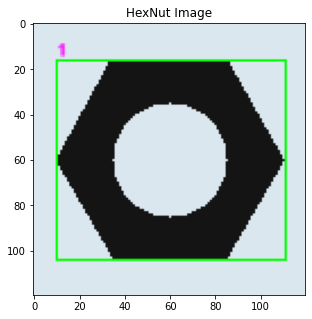

In [65]:
result =Analayse(hexnut_template_closed, hexnut_template.copy(),1)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(result, cmap='gray')
ax.set_title("HexNut Image")
plt.show()

Analysis of Sqrt Image

Number of connected components = 1
Item No : 1
Area Is = 3227
Centroid is =  59 59




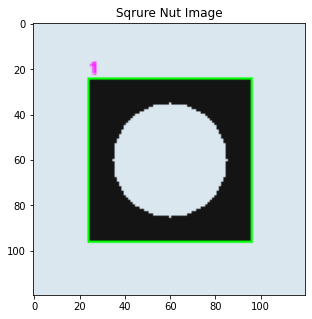

In [66]:
result = Analayse(squarenut_template_closed , squarenut_template.copy() , 1)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(result, cmap='gray')
ax.set_title("Sqrure Nut Image")
plt.show()


Analaysis of convoyer Image

Number of connected components = 4
Item No : 1
Area Is = 4636
Centroid is =  1499 199


Item No : 2
Area Is = 3087
Centroid is =  1299 399


Item No : 3
Area Is = 3087
Centroid is =  1499 499


Item No : 4
Area Is = 3144
Centroid is =  700 600




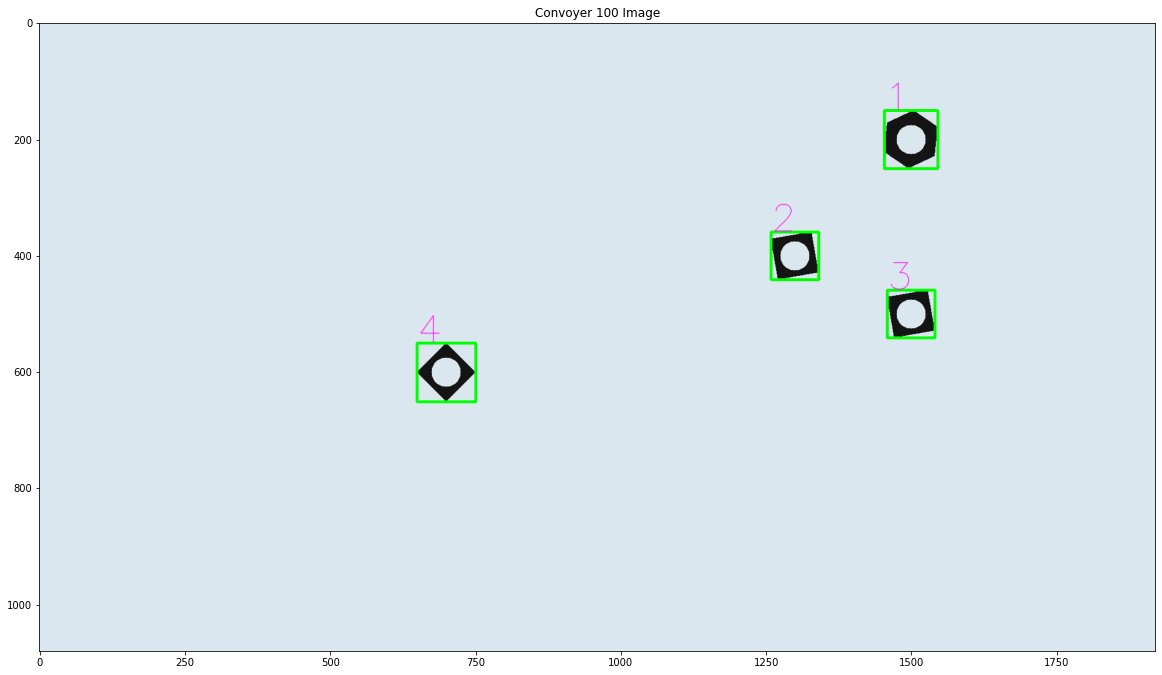

In [67]:
result = Analayse(conveyor_f100_closed , conveyor_f100.copy() , 3)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(result, cmap='gray')
ax.set_title("Convoyer 100 Image")
plt.show()

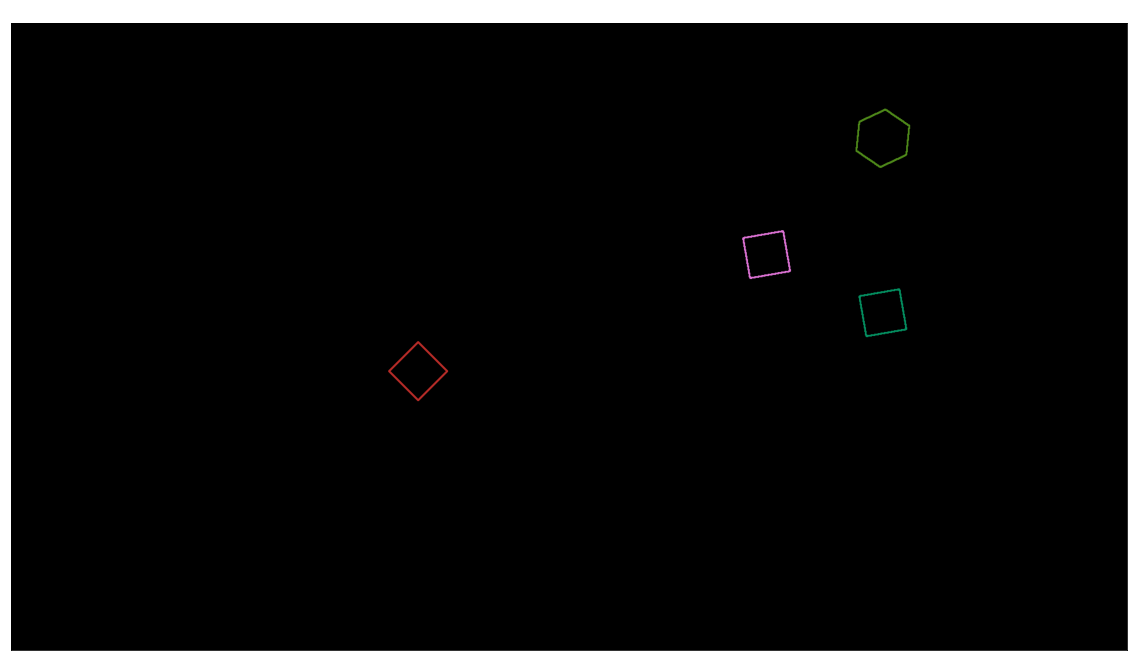

In [124]:
def ContureAnalyse(img , line_thikness):
    
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    decoy_img = np.zeros((img.shape[0],img.shape[1],3), dtype=np.uint8)

    for i in contours:
        R,G,B=np.random.randint(0, 255, 3, dtype=np.uint8)
        cv.drawContours(decoy_img,[i],0, (int(R),int(G),int(B)), line_thikness)  
    return(decoy_img)


hexnut_contures = ContureAnalyse(hexnut_template_closed , 1)
sqrtnut_contures = ContureAnalyse(squarenut_template_closed , 2)
conv_contures = ContureAnalyse(conveyor_f100_closed,2)


fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(conv_contures)
ax.set_title("gfg", color='white')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


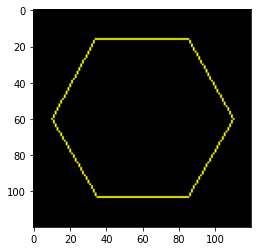

In [81]:
contours, hierarchy = cv.findContours(hexnut_template_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


of = np.zeros(hexnut_template.shape)
cv.drawContours(of,contours,-1, (32,255,0), 1)
plt.imshow(of)